In [ ]:
!pip install lasio
!pip install welly

In [1]:
from os import path
import matplotlib.pylab as plt
import numpy as np
import lasio

In [2]:
DATAPATH = path.expanduser("~/Downloads")

In [3]:
# this data has a COP_Proteus-1ST2_CH_QSLT_PnS_Processed_PTS.PDF associated with it
las = lasio.read(path.join(DATAPATH, "COP_Proteus-small/COP_Proteus-1ST2_CH_QSLT_PnS_Processed_PTS.las"))

In [19]:
data = las.df()
data.fillna(method='bfill', inplace=True)
data.fillna(method='ffill', inplace=True)

indx = ~np.isnan(data)
data = data[indx]

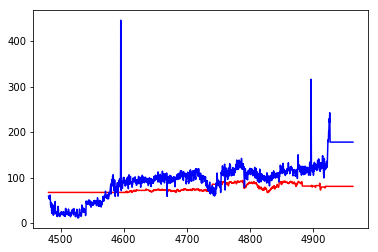

In [20]:
plt.plot(data['DTCO'], '-r')
plt.plot(data['GR_STGC'] ,'-b')
plt.show()

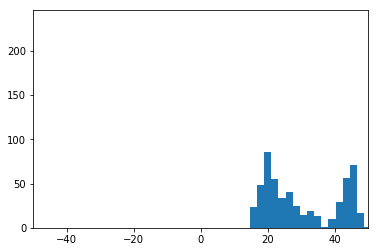

In [21]:
med = data['GR_STGC'].rolling(window=10, center=True).median()
dmed = data['GR_STGC'] - med
indx = ~np.isnan(med)
plt.hist(med[indx],100)
plt.xlim([-50,50])
plt.show()

In [22]:
indx = np.abs(data['GR_STGC'] - med > 30)
data['GR_STGC_filt'] = data['GR_STGC']              
data['GR_STGC_filt'][indx] = med[indx]

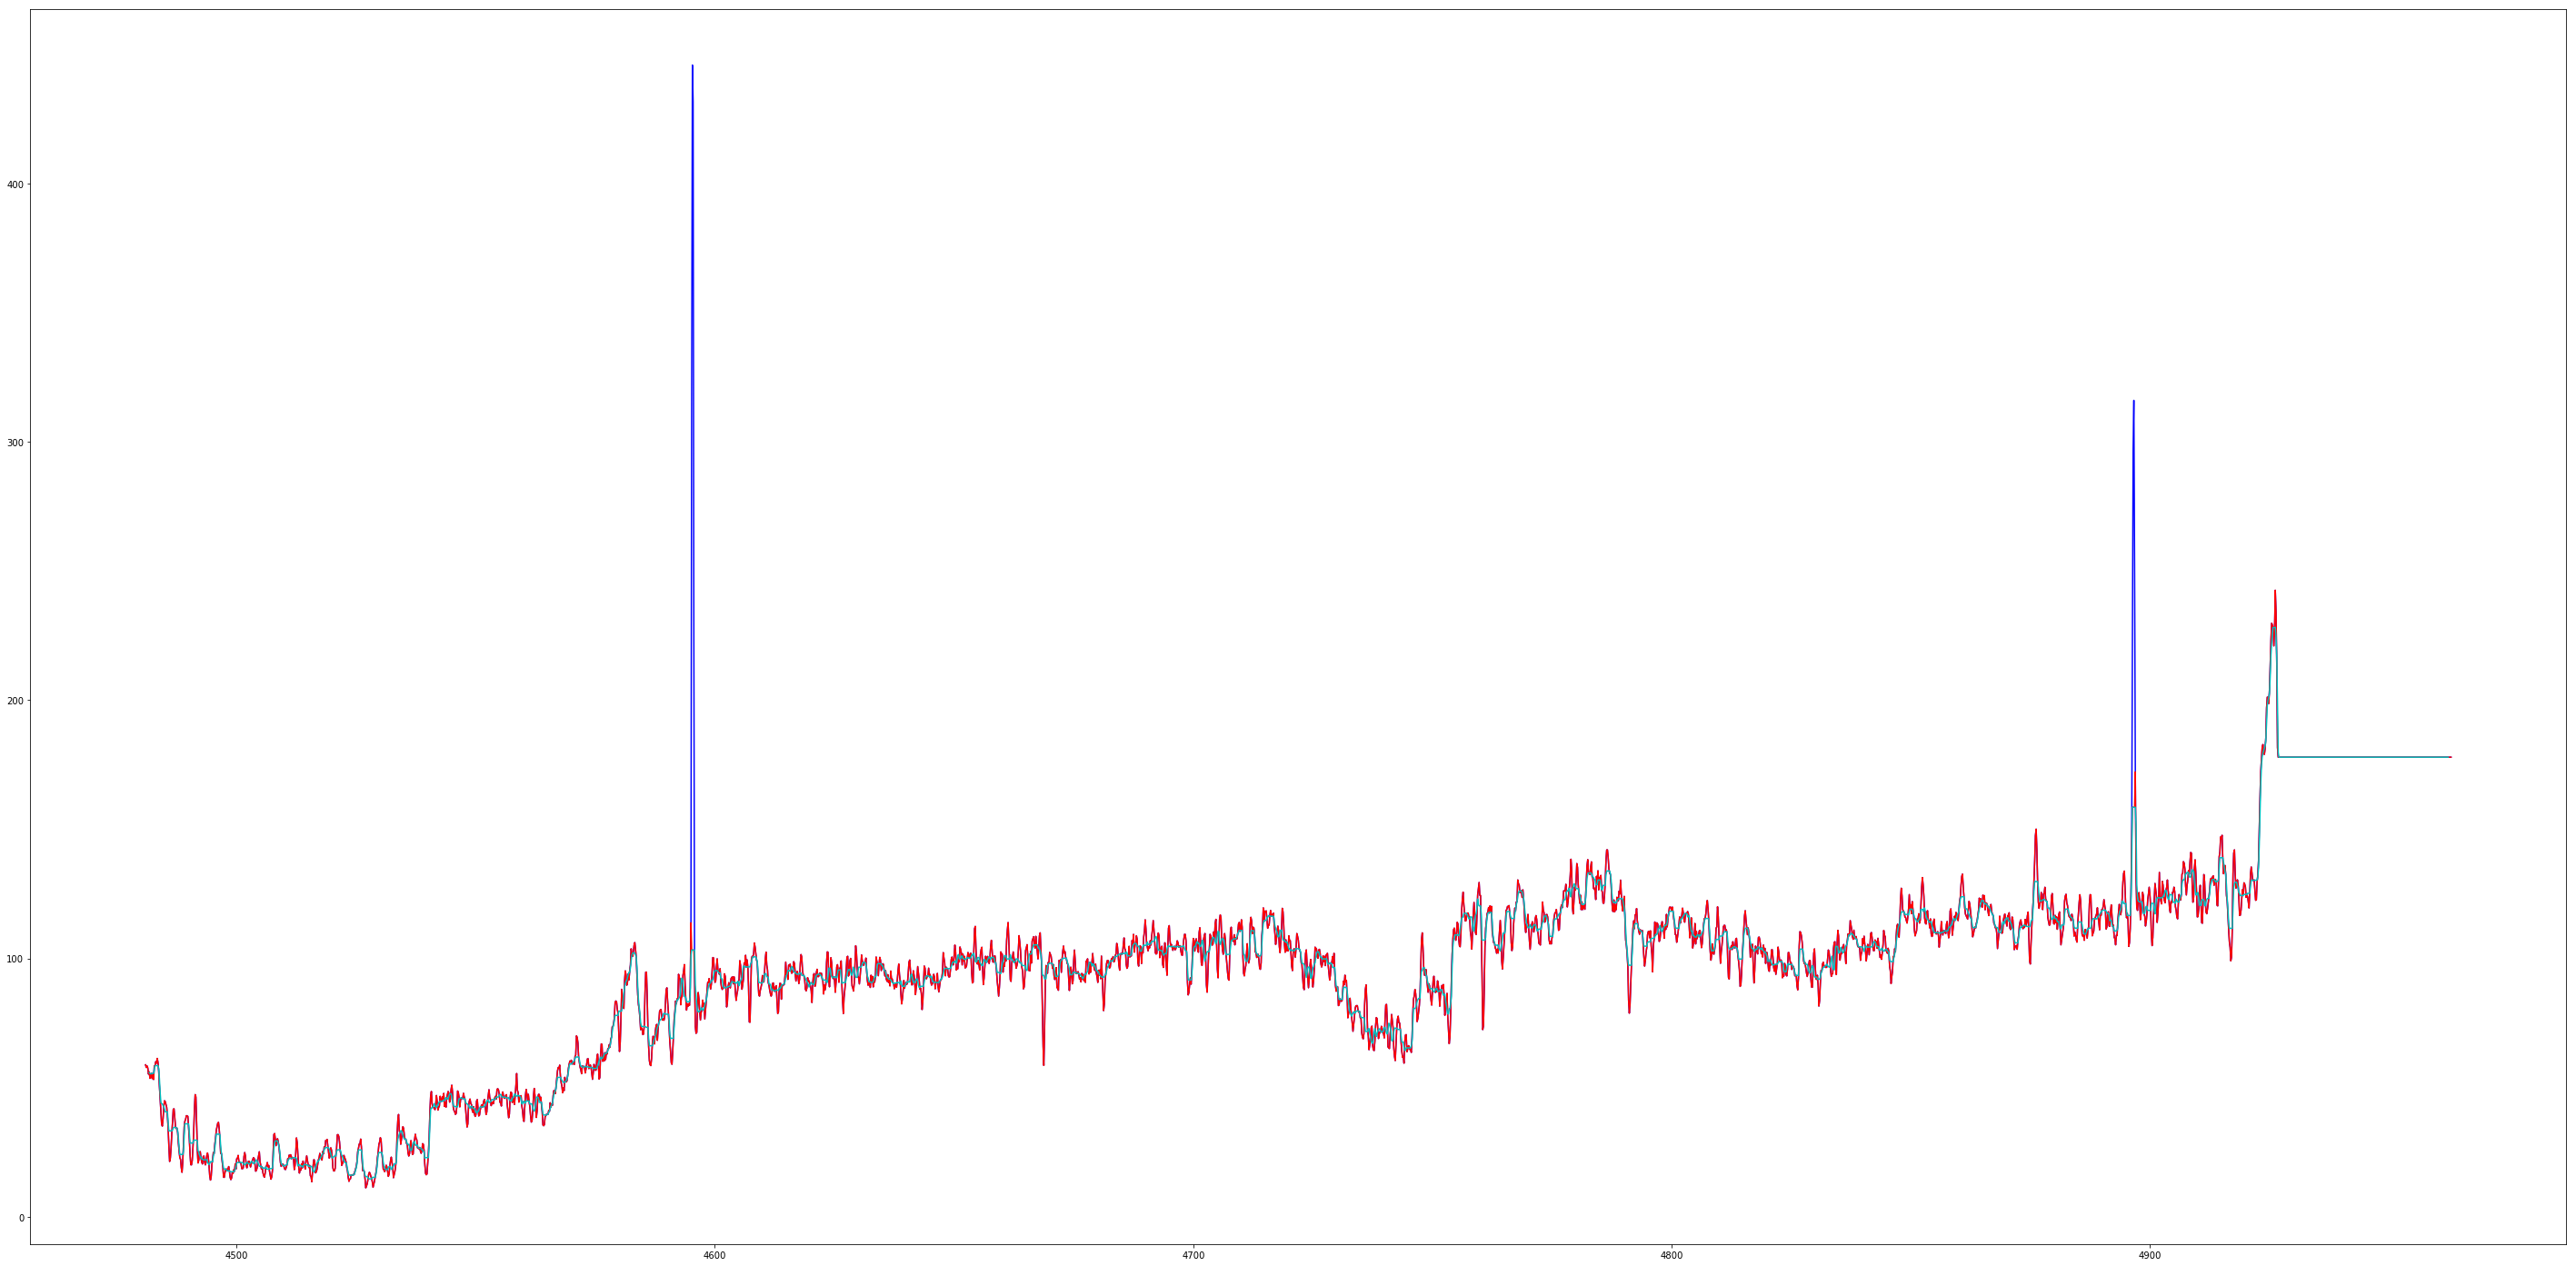

In [23]:
# data looks weird
plt.figure(figsize=(50,25))
plt.plot(data['GR_STGC'] ,'-b')
plt.plot(data['GR_STGC_filt'], '-r')
plt.plot(med, '-c')

plt.show()

In [43]:
import ruptures as rpt

# detection
algo = rpt.Pelt(model="rbf").fit(data['GR_STGC_filt'].values)
# You might train "pen" using interpreted data.
result = algo.predict(pen=10)


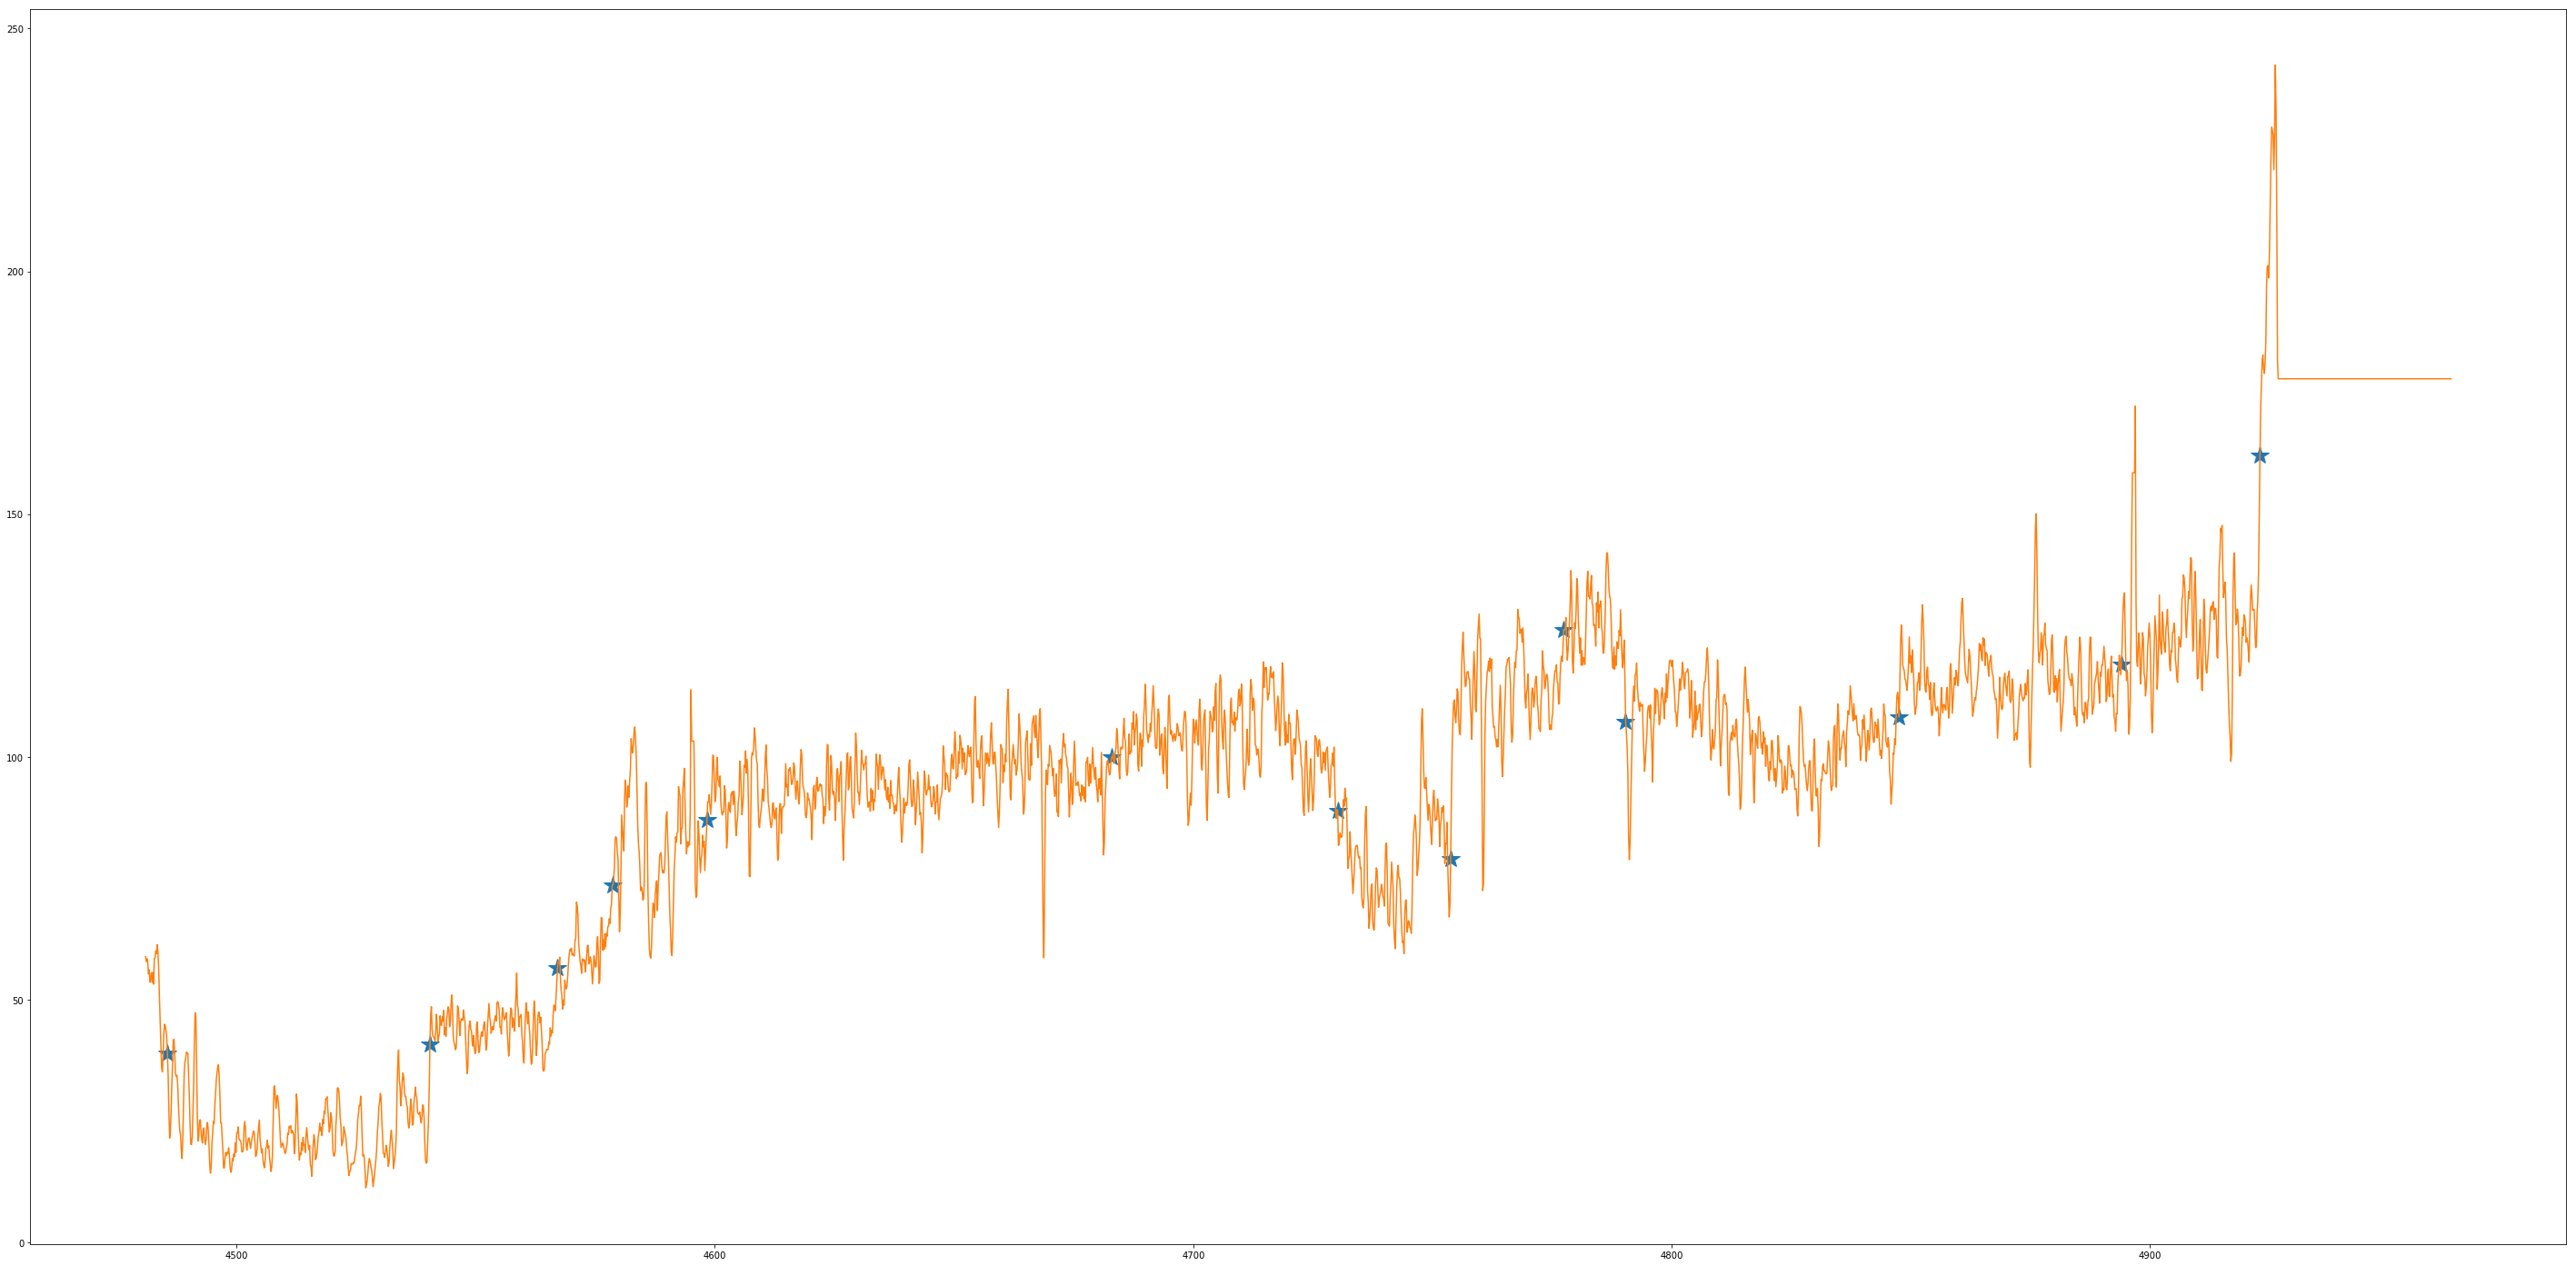

In [47]:
plt.figure(figsize=(50,25))
plt.plot(data.loc[data.index[result[:-1]], 'GR_STGC_filt'], '*', markersize=20)
plt.plot(data['GR_STGC_filt'])
plt.show()